In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()


In [3]:
len(X_train)

60000

In [4]:
len(X_test)


10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

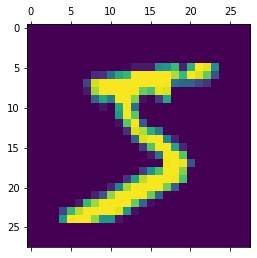

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 4ms/step - loss: 2.1887 - accuracy: 0.5872
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9776 - accuracy: 0.7056
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7911 - accuracy: 0.7358
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6272 - accuracy: 0.7599
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4844 - accuracy: 0.7764


In [14]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.4047 - accuracy: 0.8004


[1.4046541452407837, 0.8004000186920166]

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([0.31980106, 0.4014098 , 0.35308683, 0.41739517, 0.47430348,
       0.3819974 , 0.2846443 , 0.8030582 , 0.37248725, 0.5844964 ],
      dtype=float32)

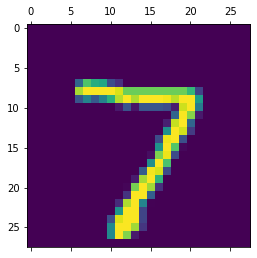

In [16]:
plt.matshow(X_test[0])

In [17]:
np.argmax(y_predicted[0])

7

In [18]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [19]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 929,    2,    5,   10,    0,    3,   25,    1,    5,    0],
       [   0, 1111,    6,    4,    0,    1,    3,    0,   10,    0],
       [  20,   87,  778,   41,   16,    0,   30,   22,   37,    1],
       [   7,   52,   26,  866,    1,    2,    5,   19,   23,    9],
       [   2,   49,    3,    0,  772,    0,   28,    9,    4,  115],
       [  38,  117,    4,  213,   30,  380,   25,   30,   24,   31],
       [  30,   48,    7,    0,   14,   10,  848,    0,    1,    0],
       [   2,   75,   14,    2,   10,    0,    2,  890,    6,   27],
       [  23,   99,    9,  103,   12,    4,   15,   24,  657,   28],
       [  23,   44,    5,   12,   68,    0,    1,   76,    7,  773]])>

Text(69.0, 0.5, 'Truth')

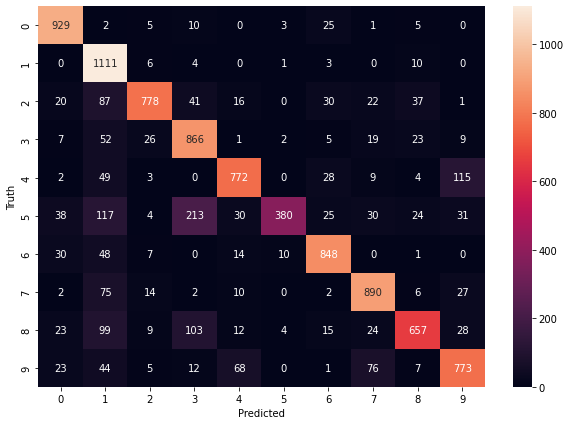

In [20]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2135 - accuracy: 0.7225
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.5020 - accuracy: 0.8716
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3920 - accuracy: 0.8934
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3488 - accuracy: 0.9028
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3241 - accuracy: 0.9079


In [22]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3038 - accuracy: 0.9129


[0.30380335450172424, 0.9128999710083008]

Text(69.0, 0.5, 'Truth')

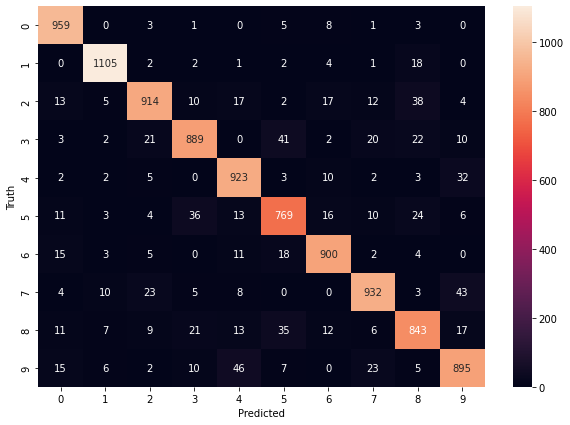

In [23]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2388 - accuracy: 0.7085
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5245 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4014 - accuracy: 0.8907
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3515 - accuracy: 0.9017
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3236 - accuracy: 0.9087
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3040 - accuracy: 0.9135
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2890 - accuracy: 0.9168
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2766 - accuracy: 0.9199
Epoch 9/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2650 - accuracy: 0.9231
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

In [25]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2476 - accuracy: 0.9286


[0.24755121767520905, 0.928600013256073]